In [26]:
import pandas as pd
from utility_functions import cross_validate_and_save_model, vectorize, evaluate,get_confused_samples
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Split data
into training and test sets

In [3]:
df = pd.read_csv(f'../data/6 - Classification data/full_classification_df.csv')
df.dropna(subset=['NonStopwordsQuoteText'],inplace=True)
df.head()

,Type,QuoteWordCount,QuoteLen,StartDate,Speaker,QuoteText,NonStopwordsQuoteText,Tag
0,Committee,114.0,690.0,2022-01-17 12:00:00,"<< יור >> היו""ר אפרת רייטן מרום: << יור >>",בשיחות שקיימתי עם האוצר ובשיחות שקיימתי אם יוש...,בשיחות שקיימתי האוצר ובשיחות שקיימתי יושב-ראש ...,כלכלי
1,Committee,114.0,690.0,2022-01-17 12:00:00,"<< יור >> היו""ר אפרת רייטן מרום: << יור >>",בשיחות שקיימתי עם האוצר ובשיחות שקיימתי אם יוש...,בשיחות שקיימתי האוצר ובשיחות שקיימתי יושב-ראש ...,כלכלי
2,Committee,110.0,625.0,2021-03-03 14:00:00,<< דובר >> מיכל וונש (כחול לבן): << דובר >>,"כן בהקשר הנכון, אדוני היושב-ראש, כיוון שהביקור...",בהקשר הנכון היושב-ראש כיוון שהביקורת הסגירה הס...,קורונה
3,Committee,133.0,696.0,2017-02-21 11:00:00,"היו""ר דוד אמסלם:","אני אומר בגדול, בסך הכול יש לנו אתרים מקודשים ...",בגדול בסך הכול אתרים מקודשים לעם היהודי לעם הי...,בלי
4,Committee,113.0,577.0,2017-02-20 10:30:00,"היו""ר קארין אלהרר:","תראו, אנחנו עוסקים היום בנושא כאוב ועצוב. הוא ...",תראו עוסקים כאוב ועצוב כאוב ועצוב פעמיים רשלנו...,בריאות


In [4]:
X = df['NonStopwordsQuoteText']
y = df['Tag']
names = ["X_train", "X_test", "y_train", "y_test"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for name, data in enumerate([X_train, X_test, y_train, y_test]):
    data.reset_index(drop=True, inplace=True)
    data.to_csv(f'../data/6 - Classification data/{names[name]}.csv', index=0)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

print("Tags distribution:\n")
print("train tags\n", y_train.value_counts(), "\n")
print("test tags\n", y_test.value_counts())

Tags distribution:

train tags
 בלי           826
קורונה        176
חינוך         176
רווחה         160
כלכלי         140
בריאות        138
נשים          128
בטחון פנים     76
בטחון          73
Name: Tag, dtype: int64 

test tags
 בלי           209
כלכלי          46
נשים           40
חינוך          38
קורונה         35
רווחה          31
בטחון          26
בטחון פנים     26
בריאות         23
Name: Tag, dtype: int64


In [49]:
y_test[y_test!="בלי"].shape[0]

265

## Vectorize data

In [5]:
X_train_counts, X_test_counts = vectorize(X_train, X_test,"simple_counts")
X_train_tfidf, X_test_tfidf = vectorize(X_train, X_test,"tfidf")

simple counts: 1893 quotes, 68508 words in train set
TFIDF: 1893 quotes, 68508 words in train set


# Classificaiton models
## Logistic Regression
#### Logistic Regression with simple counts

In [6]:
logistic_simple_model, logistic_simple_predicted = cross_validate_and_save_model(LogisticRegression(), X_train_counts, y_train, X_test_counts, kf, scoring, 'logistic_simple_counts',1)

cross validation scores (5fold) for logistic_simple_counts:
accuracy: 0.6085395987770659
precision_macro: 0.7774329891395355
recall_macro: 0.3812082016318558
f1_macro: 0.44426700786534423


In [7]:
logistic_c2_simple_model, logistic_c2_simple_predicted = cross_validate_and_save_model(LogisticRegression(C=2), X_train_counts, y_train, X_test_counts, kf, scoring, 'logistic_c2_simple_counts',1)

cross validation scores (5fold) for logistic_c2_simple_counts:
accuracy: 0.6127668188354205
precision_macro: 0.7693892002677285
recall_macro: 0.3891858292555281
f1_macro: 0.45390343490841867


In [8]:
logistic_c05_simple_model, logistic_c05_simple_predicted = cross_validate_and_save_model(LogisticRegression(C=0.5), X_train_counts, y_train, X_test_counts, kf, scoring, 'logistic_c05_simple_counts',1)

cross validation scores (5fold) for logistic_c05_simple_counts:
accuracy: 0.6053705797769122
precision_macro: 0.7910174892883531
recall_macro: 0.3738810246944856
f1_macro: 0.43615342659438844


#### Logistic Regression with TFIDF

In [9]:
logistic_tfidf_model, logistic_tfidf_predicted = cross_validate_and_save_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, kf, scoring, 'logistic_tfidf_counts',1)

cross validation scores (5fold) for logistic_tfidf_counts:
accuracy: 0.5440912454105066
precision_macro: 0.548740506097675
recall_macro: 0.2726759386625573
f1_macro: 0.2978022246244569


In [10]:
logistic_c05_tfidf_model, logistic_c05_tfidf_predicted = cross_validate_and_save_model(LogisticRegression(C=0.5), X_train_tfidf, y_train, X_test_tfidf, kf, scoring, 'logistic_c05_tfidf_counts',1)

cross validation scores (5fold) for logistic_c05_tfidf_counts:
accuracy: 0.5282419622789016
precision_macro: 0.4678973990514644
recall_macro: 0.24536807146289372
f1_macro: 0.26224502277084294


## Random Forest
#### Random forest with simple counts

In [11]:
forest_30_100_simple_model, forest_30_100_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=30, max_depth=100), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_30_100_simple_counts',1)

cross validation scores (5fold) for forest_30_100_simple_counts:
accuracy: 0.5821292457176362
precision_macro: 0.6978911159337036
recall_macro: 0.33710236175512975
f1_macro: 0.38018083188132185


In [12]:
forest_100_100_simple_model, forest_100_100_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=100, max_depth=100), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_100_100_simple_counts',1)

cross validation scores (5fold) for forest_100_100_simple_counts:
accuracy: 0.5773743211737934
precision_macro: 0.7187595266000691
recall_macro: 0.3334633933275407
f1_macro: 0.37658918568692595


In [13]:
forest_200_100_simple_model, forest_200_100_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=200, max_depth=100), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_200_100_simple_counts',1)

cross validation scores (5fold) for forest_200_100_simple_counts:
accuracy: 0.5768410325138558
precision_macro: 0.7171204250319576
recall_macro: 0.3328694099136982
f1_macro: 0.3752324348366732


In [14]:
forest_100_200_simple_model, forest_100_200_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=100, max_depth=200), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_100_200_simple_counts',1)

cross validation scores (5fold) for forest_100_200_simple_counts:
accuracy: 0.5974452401893036
precision_macro: 0.7414251794424379
recall_macro: 0.3677791444004187
f1_macro: 0.4223506953811455


In [15]:
forest_100_1000_simple_model, forest_100_1000_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=100, max_depth=1000), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_100_1000_simple_counts',1)

cross validation scores (5fold) for forest_100_1000_simple_counts:
accuracy: 0.6016710642040458
precision_macro: 0.7647617503370416
recall_macro: 0.37352886384395934
f1_macro: 0.43128562589067965


In [16]:
forest_150_1000_simple_model, forest_150_1000_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=150, max_depth=1000), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_150_1000_simple_counts',1)

cross validation scores (5fold) for forest_150_1000_simple_counts:
accuracy: 0.6048414792478117
precision_macro: 0.7501018598282496
recall_macro: 0.3751865023698913
f1_macro: 0.43149330469942004


#### Random forest with TFIDF

In [17]:
forest_100_200_tfidf_model, forest_100_200_tfidf_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=100, max_depth=200), X_train_tfidf, y_train, X_test_tfidf, kf, scoring, 'forest_100_200_tfidf_counts',1)

cross validation scores (5fold) for forest_100_200_tfidf_counts:
accuracy: 0.5969189317474278
precision_macro: 0.7719983867305529
recall_macro: 0.3699266915948066
f1_macro: 0.42255443938504983


In [18]:
forest_100_1000_tfidf_model, forest_100_1000_tfidf_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=100, max_depth=1000), X_train_tfidf, y_train, X_test_tfidf, kf, scoring, 'forest_100_1000_tfidf_counts',1)

cross validation scores (5fold) for forest_100_1000_tfidf_counts:
accuracy: 0.5963926233055521
precision_macro: 0.781666081772906
recall_macro: 0.36492545059931786
f1_macro: 0.42046283501553183


## SVM
#### SVM with simple counts

In [19]:
svm_simple_model, svm_simple_predicted = cross_validate_and_save_model(svm.SVC(), X_train_counts, y_train, X_test_counts, kf, scoring, 'svm_simple_counts',1)

cross validation scores (5fold) for svm_simple_counts:
accuracy: 0.5324719744244811
precision_macro: 0.4785024711536313
recall_macro: 0.25984777334816334
f1_macro: 0.2811549896273393


#### SVM with TFIDF

In [20]:
svm_tfidf_model, svm_tfidf_predicted = cross_validate_and_save_model(svm.SVC(), X_train_tfidf, y_train, X_test_tfidf, kf, scoring, 'svm_tfidf_counts',1)

cross validation scores (5fold) for svm_tfidf_counts:
accuracy: 0.5356423894682469
precision_macro: 0.6092429909881065
recall_macro: 0.26646231776750745
f1_macro: 0.29162992268963533


# Evaluation

In [42]:
quotes = X_test.reset_index()
quotes['true'] = y_test
mat_tags = ['בטחון','בטחון פנים','בלי','בריאות','חינוך','כלכלי','נשים','קורונה','רווחה']
quotes

,index,NonStopwordsQuoteText,true
0,0,זימנתי המלג מתמרצים מעודדים סטודנטים ללימודי פ...,חינוך
1,1,העבודה הרווחה והבריאות 24 באוגוסט באלול התשף ל...,בלי
2,2,שבאתם מתשע בבוקר ועדות ברוב ועדות דנים בסוגיות...,רווחה
3,3,פותחים להגברת אכיפה דיני הפחתה סכום העיצום הכס...,בלי
4,4,המהלכים הללו קשורים בחוות הדעת האפידמיולוגית ש...,קורונה
...,...,...,...
469,469,לברך שבאתם מובן מאליו קורה שחברי ועדה מהכנסת מ...,בריאות
470,470,ברשותכם פותחת נתוני התחלואה ומדיניות הבדיקות ה...,קורונה
471,471,בדקתי נתונים במסגרת הכספים משמש שכולם כמרכז הק...,בלי
472,472,מנציגת המממ מריה רבינוביץ שעסקה בהכנת מסמך עבו...,בלי


## Logistic regression

-------Logistic Regression simple counts, C=1) Evaluation-------
Micro:
precision: 0.6012658227848101
recall: 0.6012658227848101
f1: 0.6012658227848101

Macro:
precision: 0.7385785964217336
recall: 0.3901286198935125
f1: 0.44908916098132856

Accuracy: 0.6012658227848101

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 163 of 189 (86.24338624338624%)

Distribution of misclassified topics:
בלי       163
קורונה      6
רווחה       6
כלכלי       5
חינוך       4
בריאות      3
בטחון       1
נשים        1
Name: predicted, dtype: int64


,index,NonStopwordsQuoteText,true,predicted
0,0,זימנתי המלג מתמרצים מעודדים סטודנטים ללימודי פ...,חינוך,בלי
1,1,העבודה הרווחה והבריאות 24 באוגוסט באלול התשף ל...,בלי,קורונה
2,2,שבאתם מתשע בבוקר ועדות ברוב ועדות דנים בסוגיות...,רווחה,בלי
4,4,המהלכים הללו קשורים בחוות הדעת האפידמיולוגית ש...,קורונה,בלי
5,5,כפל הגמלאות שנמצא שדיברנו באותו הסיפור ההכשרה ...,כלכלי,בלי
...,...,...,...,...
463,463,יושבת-הראש לברך קיומו חייבת להודות שהנושא הגיע...,רווחה,בלי
468,468,להשתתף בצערם משפחות השוטרים האיל סתאווי וכמיל ...,בטחון פנים,בלי
469,469,לברך שבאתם מובן מאליו קורה שחברי ועדה מהכנסת מ...,בריאות,בלי
470,470,ברשותכם פותחת נתוני התחלואה ומדיניות הבדיקות ה...,קורונה,בריאות


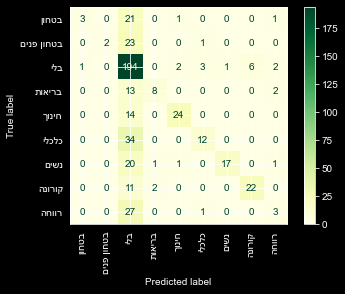

In [41]:
evaluate("-------Logistic Regression simple counts, C=1) Evaluation-------",y_test,logistic_simple_predicted,mat_tags)
get_confused_samples(quotes,logistic_simple_predicted)

-------Logistic Regression simple counts, C=2) Evaluation-------
Micro:
precision: 0.6054852320675106
recall: 0.6054852320675106
f1: 0.6054852320675106

Macro:
precision: 0.7483836246695945
recall: 0.39954322434207273
f1: 0.46102536374120784

Accuracy: 0.6054852320675106

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 160 of 187 (85.56149732620321%)

Distribution of misclassified topics:
בלי       160
קורונה      6
רווחה       6
כלכלי       6
חינוך       4
בריאות      3
בטחון       1
נשים        1
Name: predicted, dtype: int64


,index,NonStopwordsQuoteText,true,predicted
0,0,זימנתי המלג מתמרצים מעודדים סטודנטים ללימודי פ...,חינוך,בלי
1,1,העבודה הרווחה והבריאות 24 באוגוסט באלול התשף ל...,בלי,קורונה
2,2,שבאתם מתשע בבוקר ועדות ברוב ועדות דנים בסוגיות...,רווחה,בלי
4,4,המהלכים הללו קשורים בחוות הדעת האפידמיולוגית ש...,קורונה,בלי
5,5,כפל הגמלאות שנמצא שדיברנו באותו הסיפור ההכשרה ...,כלכלי,בלי
...,...,...,...,...
463,463,יושבת-הראש לברך קיומו חייבת להודות שהנושא הגיע...,רווחה,בלי
468,468,להשתתף בצערם משפחות השוטרים האיל סתאווי וכמיל ...,בטחון פנים,בלי
469,469,לברך שבאתם מובן מאליו קורה שחברי ועדה מהכנסת מ...,בריאות,בלי
470,470,ברשותכם פותחת נתוני התחלואה ומדיניות הבדיקות ה...,קורונה,בריאות


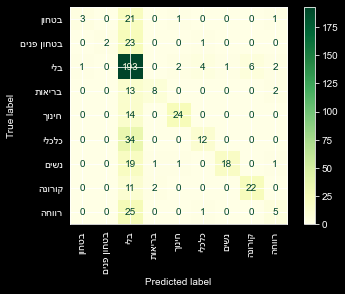

In [40]:
evaluate("-------Logistic Regression simple counts, C=2) Evaluation-------",y_test,logistic_c2_simple_predicted,mat_tags)
get_confused_samples(quotes,logistic_c2_simple_predicted)

In [24]:
confused = get_confused_samples(quotes, logistic_simple_predicted)
confused.drop(columns=['index'],inplace=True)


--------- confusion analysis----------
misclassified as no topic: 163 of 189 (86.24338624338624%)

Distribution of misclassified topics:
בלי       163
קורונה      6
רווחה       6
כלכלי       5
חינוך       4
בריאות      3
בטחון       1
נשים        1
Name: predicted, dtype: int64


In [27]:
for q in confused[(confused['true'] == 'חינוך') & (confused['predicted'] == 'בלי')]['NonStopwordsQuoteText']:
    print(q)
    print()

זימנתי המלג מתמרצים מעודדים סטודנטים ללימודי פסיכולוגיה מסירים חסמים ובעיות בפני הכשרה מקצועית והכי מתמרצים מלגות סיוע אופרטיביים למקצועות

שנתחיל מילים רגעי שמחה שחוויתי כשהצלחנו להחזיר מנהלות המשפחתונים בחזרה המשפחתונים שלהן שהובטחו הזכויות שלהן והפיצוי שלהן עבור תקופת משבר הקורונה

החינוך התרבות והספורט ה-27 בדצמבר כז בכסלו תשעז דיווח שנתי 6 לחוק זכויות התלמיד תשסא-2000

הרעיון לייצר תקנה ציבורית שברוב הרשויות מפעילים קייטנות רגילות קייטנות שלהן קייטנות ציבוריות המשמעות המשמעות הפעלת קייטנה כזאת ציבורית לייצר לאלה שבאים ואומרים היכולת קייטנה קייטנה ציבורית קייטנה שבה המינימום הנדרש להפעיל נקבעו הדברים נקבע דומה לקייטנה הנוכחית הווה שבכל עיר קייטנה קייטנה ציבורית קבעו המינימום

לבקשת כתבתי מסמך קצר קידום מדעי הרוח בישראל שמונח בפניכם ראשית אתחיל בנתונים בסיסיים לימודי מדעי הרוח במסמך הנבחנים בספרות ברמה 5 יחידות לימוד הצטמצם במשך 20 ממחצית הנבחנים בהיסטוריה ירד בכשליש שבתנך הנבחנים ברמה 5 יחידות לימוד עלה הנבחנים ברמה 5 יחידות לימוד בחינוך הדתי במקביל צמצום בשיעור הנבחנים ברמה 5 יחיד

In [28]:
for q in confused[(confused['true'] == 'נשים') & (confused['predicted'] == 'בלי')]['NonStopwordsQuoteText']:
    print(q)
    print()

חייבת להתחיל ולהגיד מתרגשת מהישיבה מתרגשת תיכננו קידמנו וחשבנו שנגיע לישיבה טעונה ולפחות הרגשתי לקראת נסיגה משמעותית המאבק בסחר בנשים שהגיעו והידיעות שהגיעו לאוזניי שינוי מהותי שנע פירוק לתיאום המאבק בסחר בבני שבתוך המשפטים שנע הציר שבין פירוק וביטול לשינוי המצב מבחינה ארגונית שהיו דיונים המשרד תיכף אתייחס מגיעות לישיבה שומרים ומפתחים ואפילו מחזקים שהובטח בשיחות שקדמו

פותחת לביטחון פנים ה-29 בדצמבר כה בטבת תשפב האיזוק האלקטרוני ככלי למלחמה באלימות במשפחה דיווח התקדמות החקיקה הממשלתית

האמירה השנייה אחזור אליה בסיום דבריי שבעצה משותפת שיזמו בחרנו להעמיד במרכז החוקה הזכות להורות וזאת מודעים היטב שטרם הגענו למנוחה ולנחלה במסע הארוך עבר השוויון הגאה חבריה חברותיה בהרבה תחומים חשובים הבחירה המשותפת בלהציב הזכות להורות בעיניי בחירה מסר

כללי שנוגע לחדרים האקוטיים מחזיק בידי החדרים האקוטיים הבעיה להתייחס אליו הרי נייר מסווג ושלא לבוא ההמלצה שנתנה תת כללי מדבר פתיחה חדרים אקוטיים ובתוך פרישת החדרים האקוטיים הבעיה להתייחס לדוח שמוכן בפניי

הנציבות האירופאית שנת קבע שההשתתפות נשים במדע וטכנולוג

In [29]:
for q in confused[(confused['true'] == 'בטחון') & (confused['predicted'] == 'בלי')]['NonStopwordsQuoteText']:
    print(q)
    print()

שוחחתי מנכל הביטחון לשם ומתאים מדייק במילים המסר בחרו אגף השיקום בחרו זמני ועדיין הופך הסוגיה לסוגיה מורכבת ההיבט החוקי מנהלים מכרזים במדינה

בעבר כלל בדמוקרטיות חברה גוף זכאי שיוכח מאז לאדן הפיל מגדלי התאומים התהפך אזרח שעובר בבידוק חשוד עימו פצצה והולך להפיל המטוס שיוכח אומרים להוריד להוציא הכיסים להפיל מטוס התעופה נכנס הבנקאות

סגנית היועץ המשפטי למערכת הביטחון מבקשים לאשר כליאתם לוחמים בלתי חוקיים 3 מטרתו העיקרית כליאתם לוחמים בלתי חוקיים משנת 2002 לעגן הסמכות לכלוא שנטל בפעולות איבה כנגד מדינת במקרים מתקיימים לגביו התנאים שמקנים מעמד שבוי מלחמה להבטיח תנאי כליאה הולמים וביקורת שיפוטית בעיון תקופתי כליאתו הכלוא מטרת שלפנינו קיים כהוראת מ-2008 ובטלה

ממלא נציב קבילות החיילים בשנתיים האחרונות ברגיל מבצע תפקידי הקבוע כמבקר מערכת הביטחון מודה ההזדמנות שניתנה ממלא בהזדמנות לאחל לרחלי הצלחה מהיכרותי האישית רחלי היכולות האישיות היושר וההגינות שהדבר יסוכם ונוכל לאחל

בחרה לעסוק בסוגיה מלחמת הכיפורים מלחמה ספק המשברים הגדולים המשבר הגדול בתולדות מדינת

שכבר ב-2016 חברה וביטחון ועדה חסויה מא

-------Logistic Regression simple counts, C=0.5) Evaluation-------
Micro:
precision: 0.5970464135021097
recall: 0.5970464135021097
f1: 0.5970464135021097

Macro:
precision: 0.7336842170175504
recall: 0.3817623685583381
f1: 0.4376382304089498

Accuracy: 0.5970464135021097

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 166 of 191 (86.91099476439791%)

Distribution of misclassified topics:
בלי       166
קורונה      6
רווחה       6
כלכלי       5
חינוך       3
בריאות      3
בטחון       1
נשים        1
Name: predicted, dtype: int64


,index,NonStopwordsQuoteText,true,predicted
0,0,זימנתי המלג מתמרצים מעודדים סטודנטים ללימודי פ...,חינוך,בלי
1,1,העבודה הרווחה והבריאות 24 באוגוסט באלול התשף ל...,בלי,קורונה
2,2,שבאתם מתשע בבוקר ועדות ברוב ועדות דנים בסוגיות...,רווחה,בלי
4,4,המהלכים הללו קשורים בחוות הדעת האפידמיולוגית ש...,קורונה,בלי
5,5,כפל הגמלאות שנמצא שדיברנו באותו הסיפור ההכשרה ...,כלכלי,בלי
...,...,...,...,...
463,463,יושבת-הראש לברך קיומו חייבת להודות שהנושא הגיע...,רווחה,בלי
468,468,להשתתף בצערם משפחות השוטרים האיל סתאווי וכמיל ...,בטחון פנים,בלי
469,469,לברך שבאתם מובן מאליו קורה שחברי ועדה מהכנסת מ...,בריאות,בלי
470,470,ברשותכם פותחת נתוני התחלואה ומדיניות הבדיקות ה...,קורונה,בריאות


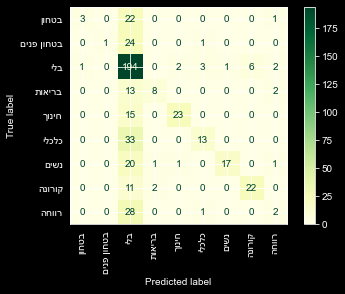

In [30]:
evaluate("-------Logistic Regression simple counts, C=0.5) Evaluation-------",y_test,logistic_c05_simple_predicted,mat_tags)
get_confused_samples(quotes,logistic_c05_simple_predicted)

-------Logistic Regression TFIDF counts, C=1) Evaluation-------
Micro:
precision: 0.5759493670886076
recall: 0.5759493670886076
f1: 0.5759493670886076

Macro:
precision: 0.6300598715917344
recall: 0.33691756272401435
f1: 0.3765633219691174

Accuracy: 0.5759493670886076

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 186 of 201 (92.53731343283582%)

Distribution of misclassified topics:
בלי       186
קורונה      6
חינוך       4
כלכלי       2
בריאות      2
נשים        1
Name: predicted, dtype: int64


,index,NonStopwordsQuoteText,true,predicted
0,0,זימנתי המלג מתמרצים מעודדים סטודנטים ללימודי פ...,חינוך,בלי
1,1,העבודה הרווחה והבריאות 24 באוגוסט באלול התשף ל...,בלי,קורונה
2,2,שבאתם מתשע בבוקר ועדות ברוב ועדות דנים בסוגיות...,רווחה,בלי
4,4,המהלכים הללו קשורים בחוות הדעת האפידמיולוגית ש...,קורונה,בלי
5,5,כפל הגמלאות שנמצא שדיברנו באותו הסיפור ההכשרה ...,כלכלי,בלי
...,...,...,...,...
463,463,יושבת-הראש לברך קיומו חייבת להודות שהנושא הגיע...,רווחה,בלי
468,468,להשתתף בצערם משפחות השוטרים האיל סתאווי וכמיל ...,בטחון פנים,בלי
469,469,לברך שבאתם מובן מאליו קורה שחברי ועדה מהכנסת מ...,בריאות,בלי
470,470,ברשותכם פותחת נתוני התחלואה ומדיניות הבדיקות ה...,קורונה,בלי


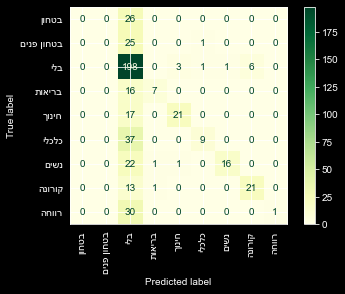

In [31]:
evaluate("-------Logistic Regression TFIDF counts, C=1) Evaluation-------",y_test,logistic_tfidf_predicted,mat_tags)
get_confused_samples(quotes,logistic_tfidf_predicted)

-------Logistic Regression TFIDF counts, C=0.5) Evaluation-------
Micro:
precision: 0.5527426160337553
recall: 0.5527426160337553
f1: 0.5527426160337553

Macro:
precision: 0.5070750237416904
recall: 0.2975246086230068
f1: 0.32681144840496157

Accuracy: 0.5527426160337553

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 198 of 212 (93.39622641509435%)

Distribution of misclassified topics:
בלי       198
קורונה      6
חינוך       4
כלכלי       2
נשים        1
בריאות      1
Name: predicted, dtype: int64


,index,NonStopwordsQuoteText,true,predicted
0,0,זימנתי המלג מתמרצים מעודדים סטודנטים ללימודי פ...,חינוך,בלי
1,1,העבודה הרווחה והבריאות 24 באוגוסט באלול התשף ל...,בלי,קורונה
2,2,שבאתם מתשע בבוקר ועדות ברוב ועדות דנים בסוגיות...,רווחה,בלי
4,4,המהלכים הללו קשורים בחוות הדעת האפידמיולוגית ש...,קורונה,בלי
5,5,כפל הגמלאות שנמצא שדיברנו באותו הסיפור ההכשרה ...,כלכלי,בלי
...,...,...,...,...
463,463,יושבת-הראש לברך קיומו חייבת להודות שהנושא הגיע...,רווחה,בלי
468,468,להשתתף בצערם משפחות השוטרים האיל סתאווי וכמיל ...,בטחון פנים,בלי
469,469,לברך שבאתם מובן מאליו קורה שחברי ועדה מהכנסת מ...,בריאות,בלי
470,470,ברשותכם פותחת נתוני התחלואה ומדיניות הבדיקות ה...,קורונה,בלי


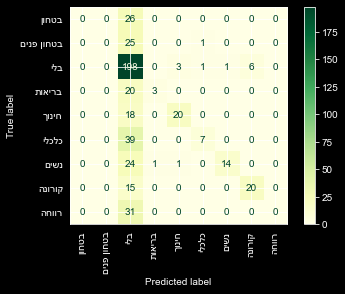

In [32]:
evaluate("-------Logistic Regression TFIDF counts, C=0.5) Evaluation-------",y_test,logistic_c05_tfidf_predicted,mat_tags)
get_confused_samples(quotes,logistic_c05_tfidf_predicted)

## Random forest

-----Random forest with simple counts, 100 trees, max depth 200) Evaluation-----
Micro:
precision: 0.5886075949367089
recall: 0.5886075949367089
f1: 0.5886075949367089

Macro:
precision: 0.6792566242131459
recall: 0.3583492256371861
f1: 0.4085540531923696

Accuracy: 0.5886075949367089

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 177 of 195 (90.76923076923077%)

Distribution of misclassified topics:
בלי       177
קורונה      5
חינוך       5
בריאות      3
כלכלי       2
רווחה       2
נשים        1
Name: predicted, dtype: int64


,index,NonStopwordsQuoteText,true,predicted
0,0,זימנתי המלג מתמרצים מעודדים סטודנטים ללימודי פ...,חינוך,בלי
2,2,שבאתם מתשע בבוקר ועדות ברוב ועדות דנים בסוגיות...,רווחה,בלי
4,4,המהלכים הללו קשורים בחוות הדעת האפידמיולוגית ש...,קורונה,בלי
5,5,כפל הגמלאות שנמצא שדיברנו באותו הסיפור ההכשרה ...,כלכלי,בלי
13,13,מצד שייצר עתודות דיור בדגש שכירות כפתרון לשוק ...,רווחה,בלי
...,...,...,...,...
464,464,בשיח שהתקיים בשבועות האחרונים כותלי עלה הצורך ...,חינוך,בלי
468,468,להשתתף בצערם משפחות השוטרים האיל סתאווי וכמיל ...,בטחון פנים,בלי
469,469,לברך שבאתם מובן מאליו קורה שחברי ועדה מהכנסת מ...,בריאות,בלי
470,470,ברשותכם פותחת נתוני התחלואה ומדיניות הבדיקות ה...,קורונה,בריאות


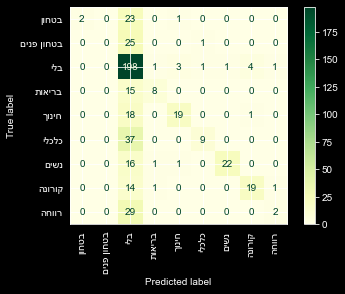

In [33]:
evaluate("-----Random forest with simple counts, 100 trees, max depth 200) Evaluation-----",y_test,forest_100_200_simple_predicted,mat_tags)
get_confused_samples(quotes,forest_100_200_simple_predicted)

-----Random forest with simple counts, 100 trees, max depth 1000) Evaluation-----
Micro:
precision: 0.5970464135021097
recall: 0.5970464135021097
f1: 0.5970464135021097

Macro:
precision: 0.6681006777055823
recall: 0.3741678400255945
f1: 0.42297147196482654

Accuracy: 0.5970464135021097

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 171 of 191 (89.52879581151832%)

Distribution of misclassified topics:
בלי       171
קורונה      5
חינוך       5
בריאות      4
רווחה       3
כלכלי       2
נשים        1
Name: predicted, dtype: int64


,index,NonStopwordsQuoteText,true,predicted
0,0,זימנתי המלג מתמרצים מעודדים סטודנטים ללימודי פ...,חינוך,בלי
2,2,שבאתם מתשע בבוקר ועדות ברוב ועדות דנים בסוגיות...,רווחה,בלי
4,4,המהלכים הללו קשורים בחוות הדעת האפידמיולוגית ש...,קורונה,בלי
5,5,כפל הגמלאות שנמצא שדיברנו באותו הסיפור ההכשרה ...,כלכלי,בלי
13,13,מצד שייצר עתודות דיור בדגש שכירות כפתרון לשוק ...,רווחה,בלי
...,...,...,...,...
464,464,בשיח שהתקיים בשבועות האחרונים כותלי עלה הצורך ...,חינוך,בלי
468,468,להשתתף בצערם משפחות השוטרים האיל סתאווי וכמיל ...,בטחון פנים,בלי
469,469,לברך שבאתם מובן מאליו קורה שחברי ועדה מהכנסת מ...,בריאות,בלי
470,470,ברשותכם פותחת נתוני התחלואה ומדיניות הבדיקות ה...,קורונה,בריאות


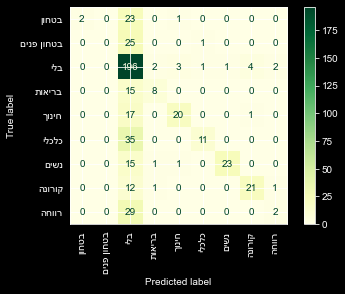

In [34]:
evaluate("-----Random forest with simple counts, 100 trees, max depth 1000) Evaluation-----",y_test,forest_100_1000_simple_predicted,mat_tags)
get_confused_samples(quotes,forest_100_1000_simple_predicted)

-----Random forest with simple counts, 150 trees, max depth 1000) Evaluation-----
Micro:
precision: 0.5822784810126582
recall: 0.5822784810126582
f1: 0.5822784810126582

Macro:
precision: 0.5565363203624073
recall: 0.35194806259986744
f1: 0.39461417176969915

Accuracy: 0.5822784810126582

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 179 of 198 (90.40404040404042%)

Distribution of misclassified topics:
בלי       179
קורונה      5
חינוך       4
בריאות      4
רווחה       3
כלכלי       2
נשים        1
Name: predicted, dtype: int64


,index,NonStopwordsQuoteText,true,predicted
0,0,זימנתי המלג מתמרצים מעודדים סטודנטים ללימודי פ...,חינוך,בלי
1,1,העבודה הרווחה והבריאות 24 באוגוסט באלול התשף ל...,בלי,קורונה
2,2,שבאתם מתשע בבוקר ועדות ברוב ועדות דנים בסוגיות...,רווחה,בלי
4,4,המהלכים הללו קשורים בחוות הדעת האפידמיולוגית ש...,קורונה,בלי
5,5,כפל הגמלאות שנמצא שדיברנו באותו הסיפור ההכשרה ...,כלכלי,בלי
...,...,...,...,...
464,464,בשיח שהתקיים בשבועות האחרונים כותלי עלה הצורך ...,חינוך,בלי
468,468,להשתתף בצערם משפחות השוטרים האיל סתאווי וכמיל ...,בטחון פנים,בלי
469,469,לברך שבאתם מובן מאליו קורה שחברי ועדה מהכנסת מ...,בריאות,בלי
470,470,ברשותכם פותחת נתוני התחלואה ומדיניות הבדיקות ה...,קורונה,בריאות


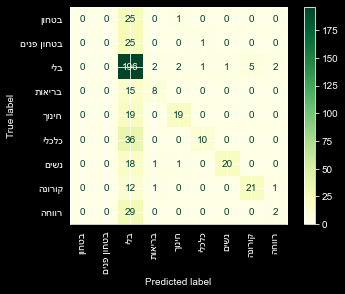

In [35]:
evaluate("-----Random forest with simple counts, 150 trees, max depth 1000) Evaluation-----",y_test,forest_150_1000_simple_predicted,mat_tags)
get_confused_samples(quotes,forest_150_1000_simple_predicted)

-----Random forest with TFIDF counts, 100 trees, max depth 200) Evaluation-----
Micro:
precision: 0.6075949367088608
recall: 0.6075949367088608
f1: 0.6075949367088608

Macro:
precision: 0.6318714578929634
recall: 0.38975572277594867
f1: 0.43238396491330655

Accuracy: 0.6075949367088608

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 164 of 186 (88.17204301075269%)

Distribution of misclassified topics:
בלי       164
קורונה      7
חינוך       4
בריאות      4
רווחה       3
כלכלי       2
נשים        1
בטחון       1
Name: predicted, dtype: int64


,index,NonStopwordsQuoteText,true,predicted
0,0,זימנתי המלג מתמרצים מעודדים סטודנטים ללימודי פ...,חינוך,בלי
1,1,העבודה הרווחה והבריאות 24 באוגוסט באלול התשף ל...,בלי,קורונה
2,2,שבאתם מתשע בבוקר ועדות ברוב ועדות דנים בסוגיות...,רווחה,בלי
5,5,כפל הגמלאות שנמצא שדיברנו באותו הסיפור ההכשרה ...,כלכלי,בלי
13,13,מצד שייצר עתודות דיור בדגש שכירות כפתרון לשוק ...,רווחה,בלי
...,...,...,...,...
464,464,בשיח שהתקיים בשבועות האחרונים כותלי עלה הצורך ...,חינוך,בלי
468,468,להשתתף בצערם משפחות השוטרים האיל סתאווי וכמיל ...,בטחון פנים,בלי
469,469,לברך שבאתם מובן מאליו קורה שחברי ועדה מהכנסת מ...,בריאות,בלי
470,470,ברשותכם פותחת נתוני התחלואה ומדיניות הבדיקות ה...,קורונה,בריאות


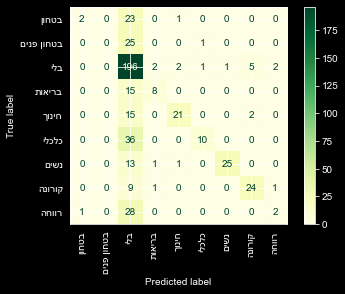

In [36]:
evaluate("-----Random forest with TFIDF counts, 100 trees, max depth 200) Evaluation-----",y_test,forest_100_200_tfidf_predicted,mat_tags)
get_confused_samples(quotes,forest_100_200_tfidf_predicted)

-----Random forest with TFIDF counts, 100 trees, max depth 1000) Evaluation-----
Micro:
precision: 0.6054852320675106
recall: 0.6054852320675106
f1: 0.6054852320675106

Macro:
precision: 0.6523516436734828
recall: 0.38772732807574467
f1: 0.4370043657880594

Accuracy: 0.6054852320675106

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 164 of 187 (87.70053475935828%)

Distribution of misclassified topics:
בלי       164
קורונה      8
בריאות      6
חינוך       3
כלכלי       2
רווחה       2
נשים        1
בטחון       1
Name: predicted, dtype: int64


,index,NonStopwordsQuoteText,true,predicted
0,0,זימנתי המלג מתמרצים מעודדים סטודנטים ללימודי פ...,חינוך,בלי
1,1,העבודה הרווחה והבריאות 24 באוגוסט באלול התשף ל...,בלי,קורונה
2,2,שבאתם מתשע בבוקר ועדות ברוב ועדות דנים בסוגיות...,רווחה,בלי
4,4,המהלכים הללו קשורים בחוות הדעת האפידמיולוגית ש...,קורונה,בלי
5,5,כפל הגמלאות שנמצא שדיברנו באותו הסיפור ההכשרה ...,כלכלי,בלי
...,...,...,...,...
464,464,בשיח שהתקיים בשבועות האחרונים כותלי עלה הצורך ...,חינוך,בלי
468,468,להשתתף בצערם משפחות השוטרים האיל סתאווי וכמיל ...,בטחון פנים,בלי
469,469,לברך שבאתם מובן מאליו קורה שחברי ועדה מהכנסת מ...,בריאות,בלי
470,470,ברשותכם פותחת נתוני התחלואה ומדיניות הבדיקות ה...,קורונה,בריאות


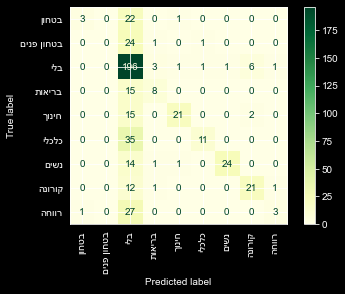

In [37]:
evaluate("-----Random forest with TFIDF counts, 100 trees, max depth 1000) Evaluation-----",y_test,forest_100_1000_tfidf_predicted,mat_tags)
get_confused_samples(quotes,forest_100_1000_tfidf_predicted)

## SVM

-----SVM with simple counts Evaluation-----
Micro:
precision: 0.5569620253164557
recall: 0.5569620253164557
f1: 0.5569620253164557

Macro:
precision: 0.53764064697609
recall: 0.30246721877156657
f1: 0.33420299347451665

Accuracy: 0.5569620253164557

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 197 of 210 (93.80952380952381%)

Distribution of misclassified topics:
בלי       197
קורונה      6
חינוך       4
כלכלי       2
נשים        1
Name: predicted, dtype: int64


,index,NonStopwordsQuoteText,true,predicted
0,0,זימנתי המלג מתמרצים מעודדים סטודנטים ללימודי פ...,חינוך,בלי
1,1,העבודה הרווחה והבריאות 24 באוגוסט באלול התשף ל...,בלי,קורונה
2,2,שבאתם מתשע בבוקר ועדות ברוב ועדות דנים בסוגיות...,רווחה,בלי
4,4,המהלכים הללו קשורים בחוות הדעת האפידמיולוגית ש...,קורונה,בלי
5,5,כפל הגמלאות שנמצא שדיברנו באותו הסיפור ההכשרה ...,כלכלי,בלי
...,...,...,...,...
463,463,יושבת-הראש לברך קיומו חייבת להודות שהנושא הגיע...,רווחה,בלי
468,468,להשתתף בצערם משפחות השוטרים האיל סתאווי וכמיל ...,בטחון פנים,בלי
469,469,לברך שבאתם מובן מאליו קורה שחברי ועדה מהכנסת מ...,בריאות,בלי
470,470,ברשותכם פותחת נתוני התחלואה ומדיניות הבדיקות ה...,קורונה,בלי


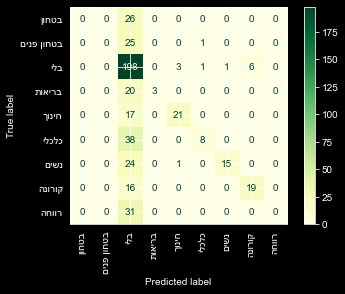

In [38]:
evaluate("-----SVM with simple counts Evaluation-----",y_test, svm_simple_predicted,mat_tags)
get_confused_samples(quotes,svm_simple_predicted)

-----SVM with TFIDF counts Evaluation-----
Micro:
precision: 0.5675105485232067
recall: 0.5675105485232067
f1: 0.5675105485232067

Macro:
precision: 0.629772408630214
recall: 0.32000935016362786
f1: 0.35573616217393433

Accuracy: 0.5675105485232067

Confusion Matrix:

--------- confusion analysis----------
misclassified as no topic: 191 of 205 (93.17073170731707%)

Distribution of misclassified topics:
בלי       191
קורונה      6
חינוך       4
כלכלי       2
נשים        1
בריאות      1
Name: predicted, dtype: int64


,index,NonStopwordsQuoteText,true,predicted
0,0,זימנתי המלג מתמרצים מעודדים סטודנטים ללימודי פ...,חינוך,בלי
1,1,העבודה הרווחה והבריאות 24 באוגוסט באלול התשף ל...,בלי,קורונה
2,2,שבאתם מתשע בבוקר ועדות ברוב ועדות דנים בסוגיות...,רווחה,בלי
4,4,המהלכים הללו קשורים בחוות הדעת האפידמיולוגית ש...,קורונה,בלי
5,5,כפל הגמלאות שנמצא שדיברנו באותו הסיפור ההכשרה ...,כלכלי,בלי
...,...,...,...,...
463,463,יושבת-הראש לברך קיומו חייבת להודות שהנושא הגיע...,רווחה,בלי
468,468,להשתתף בצערם משפחות השוטרים האיל סתאווי וכמיל ...,בטחון פנים,בלי
469,469,לברך שבאתם מובן מאליו קורה שחברי ועדה מהכנסת מ...,בריאות,בלי
470,470,ברשותכם פותחת נתוני התחלואה ומדיניות הבדיקות ה...,קורונה,בלי


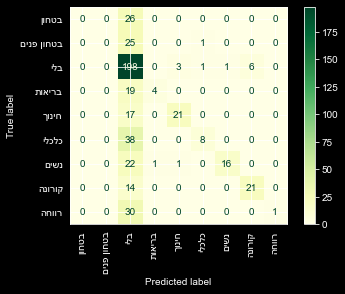

In [39]:
evaluate("-----SVM with TFIDF counts Evaluation-----",y_test, svm_tfidf_predicted,mat_tags)
get_confused_samples(quotes,svm_tfidf_predicted)